# Flights Data Exploration
## by Natalya Bakhshetyan

## Preliminary Wrangling

> This document explores US domestic flight data for years 2017 through 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Load the datasets into pandas DataFrames.

In [2]:
flight_data1 = pd.read_csv("flight_data1.csv", dtype = {'DEP_TIME': object, 'ARR_TIME': object})
flight_data2 = pd.read_csv("flight_data2.csv", dtype = {'DEP_TIME': object, 'ARR_TIME': object})
flight_data3 = pd.read_csv("flight_data3.csv", dtype = {'DEP_TIME': object, 'ARR_TIME': object})
print(flight_data1.shape, flight_data2.shape, flight_data3.shape)

(450017, 27) (570118, 27) (583985, 27)


Sample 10,000 rows from each DataFrame for our analysis.

In [3]:
sample_data1 = flight_data1.sample(n=10000, random_state=1)
sample_data2 = flight_data2.sample(n=10000, random_state=1)
sample_data3 = flight_data3.sample(n=10000, random_state=1)

Combine all 3 DataFrames into 1.

In [4]:
combined_df = pd.concat([sample_data1, sample_data2, sample_data3])

In [5]:
# high-level overview of data shape and composition
print(combined_df.shape)
print(combined_df.dtypes)
print(combined_df.columns)
print(combined_df.head())

(30000, 27)
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK              int64
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_NM         object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_NM           object
DEP_TIME                object
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_TIME                object
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 26            float64
dtype: object
Index(['YEAR', 'MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NA

Cleaning steps.

In [6]:
#convert DAY_OF_WEEK to ordered categorical

def to_categorical(col, ordered_categories):
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_categories)
    combined_df[col] = combined_df[col].astype(ordered_var)

col = "DAY_OF_WEEK"
ordered_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", 'Sunday']
combined_df[col] = combined_df[col].astype(str)
weekday_dict = {'1': 'Monday', '2' : "Tuesday", '3': 'Wednesday',
               '4': 'Thursday', '5': 'Friday', '6': 'Saturday',
               '7': 'Sunday'}
combined_df[col] = combined_df[col].replace(weekday_dict)
to_categorical(col, ordered_categories)

In [7]:
#confirm conversion of DAY_OF_WEEK to ordered categorical

combined_df.DAY_OF_WEEK.unique()

[Monday, Saturday, Thursday, Wednesday, Sunday, Tuesday, Friday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [8]:
#convert DEP_DEL15 to string
combined_df['DEP_DEL15'] = combined_df['DEP_DEL15'].astype(str)
combined_df['DEP_DEL15'].unique()

array(['1.0', '0.0', 'nan'], dtype=object)

In [9]:
# rename DEP_DEL15 values
delay_dict = {'0.0': '< 15 min', '1.0' : ">= 15 min"}
combined_df['DEP_DEL15'] = combined_df['DEP_DEL15'].replace(delay_dict)
combined_df['DEP_DEL15'].unique()

array(['>= 15 min', '< 15 min', 'nan'], dtype=object)

In [10]:
#convert CANCELLATION_CODE to meaning

col = "CANCELLATION_CODE"
cancellation_code_dict = {'A': 'carrier', 'B' : "weather", 'C': 'NAS',
               'D': 'security'}
combined_df[col] = combined_df[col].replace(cancellation_code_dict)

#confirm the conversion
combined_df.CANCELLATION_CODE.unique()

array([nan, 'carrier', 'weather', 'NAS', 'security'], dtype=object)

In [11]:
#drop rows containing null values in columns DEP_TIME and ARR_TIME
#combined_df.dropna(subset = ['ARR_TIME'], how = 'all', inplace = True)
#combined_df.dropna(subset = ['DEP_TIME'], how = 'all', inplace = True)
#confirm the change
#combined_df.shape

In [12]:
#convert DEP_TIME and ARR_TIME from string to datetime
def float_to_datetime(col):
    #combined_df[col] = combined_df[col].apply(lambda x: x.zfill(4))
    combined_df[col] = pd.to_datetime(combined_df[col], format='%H%M', errors = 'coerce').dt.time
    
float_to_datetime('DEP_TIME')
float_to_datetime('ARR_TIME')
print(combined_df.DEP_TIME.head())
print(combined_df.ARR_TIME.head())

217132    19:26:00
188169    07:22:00
159183    11:01:00
281252    06:58:00
200261    14:52:00
Name: DEP_TIME, dtype: object
217132    21:58:00
188169    07:28:00
159183    17:27:00
281252    11:54:00
200261    17:48:00
Name: ARR_TIME, dtype: object


In [13]:
#drop rows containing null values in columns DEP_TIME and ARR_TIME
#combined_df.dropna(subset = ['ARR_TIME'], how = 'all', inplace = True)
#combined_df.dropna(subset = ['DEP_TIME'], how = 'all', inplace = True)
#confirm the change
#combined_df.shape

### Dataset Structure

There are 30,000 US domestic flights in the cleaned data set from months of January from years 2017, 2018 and 2019. The original dataset was downloaded from http://stat-computing.org/dataexpo/2009/the-data.html.
Flight data including day of week, airport of origin, city of origin, state of origin, destination airport, destination city, destination state, departure time, departure delay, cancellations, divertions, air time, distance, delays will be analyzed in this project.


Variable descriptions

- Year: 1987-2008
- Month: 1-12
- DayofMonth: 1-31
- DayOfWeek: Monday-Sunday
- CRSDepTime scheduled departure time (local, hhmm)
- DepTime actual departure time (local, hhmm)
- ArrTime actual arrival time (local, hhmm)
- CRSArrTime scheduled arrival time (local, hhmm)
- UniqueCarrier	unique carrier code
- FlightNum	flight number
- TailNum	plane tail number
- ActualElapsedTime	in minutes
- CRSElapsedTime	in minutes
- AirTime	in minutes
- ArrDelay	arrival delay, in minutes
- DepDelay	departure delay, in minutes
- Origin	origin IATA airport code
- Dest	destination IATA airport code
- Distance	in miles
- TaxiIn	taxi in time, in minutes
- TaxiOut	taxi out time in minutes
- Cancelled	was the flight cancelled?
- CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- Diverted	1 = yes, 0 = no
- CarrierDelay	in minutes
- WeatherDelay	in minutes
- NASDelay	in minutes
- SecurityDelay	in minutes
- LateAircraftDelay	in minute

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

1. Distribution of flights by days of week.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

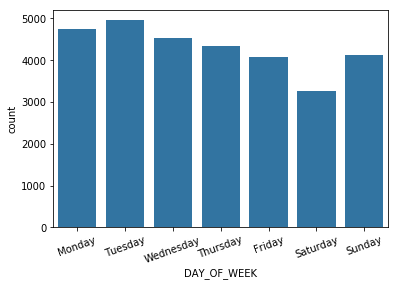

In [14]:
default_color = sb.color_palette()[0]
sb.countplot(data = combined_df, x = 'DAY_OF_WEEK', color = default_color)
plt.xticks(rotation=20)

2. Top destinations.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

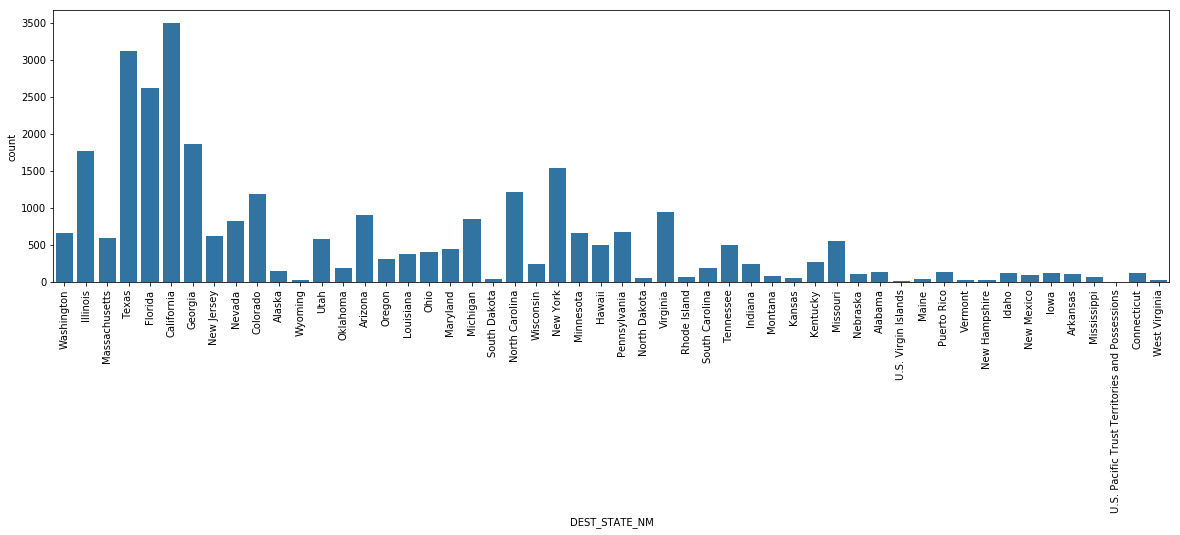

In [15]:
default_color = sb.color_palette()[0]
plt.figure(figsize = [20,5])
sb.countplot(data = combined_df, x = 'DEST_STATE_NM', color = default_color)
plt.xticks(rotation=90)

3. Distribution of departing flights based on hour of the day.

/home/nata/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nata/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


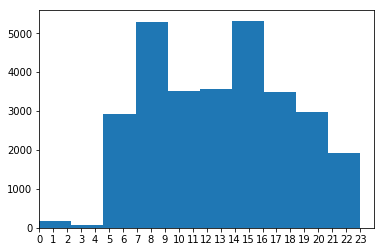

In [16]:
def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.hist(hour_list)
    plt.show()

    
chart(combined_df['DEP_TIME'])    

4. Distribution of departing flights based on hour of the day for years 2017, 2018 and 2019 depicted on separate plots. We can observe on the plots below that departure times have stayed overall consistent throughout those years with very slight changes.

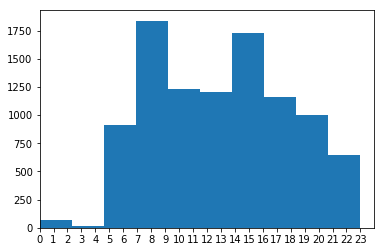

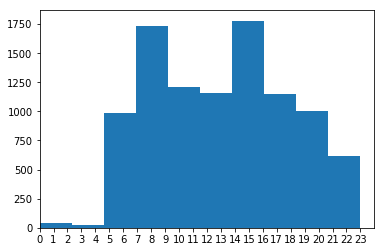

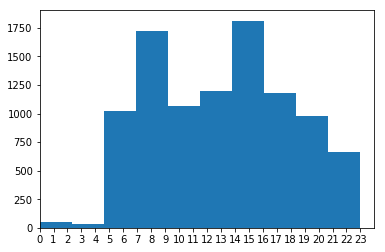

In [17]:
flights_2017 = combined_df[combined_df['YEAR'] == 2017]
flights_2018 = combined_df[combined_df['YEAR'] == 2018]
flights_2019 = combined_df[combined_df['YEAR'] == 2019]  
chart(flights_2017['DEP_TIME'])    
chart(flights_2018['DEP_TIME'])    
chart(flights_2019['DEP_TIME'])    

5. Distribution of flight durations on a standard-scaled plot.

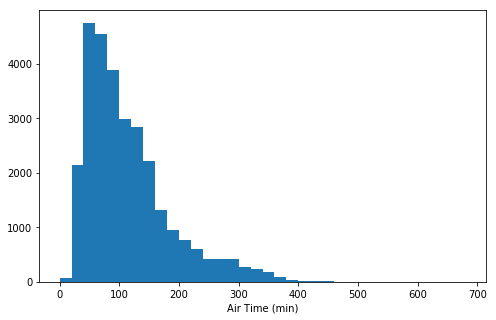

In [18]:
binsize = 20
bins = np.arange(0, combined_df['AIR_TIME'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_df, x = 'AIR_TIME', bins = bins)
plt.xlabel('Air Time (min)')
plt.show()

6. Distribution of flight durations on a log-scaled plot.

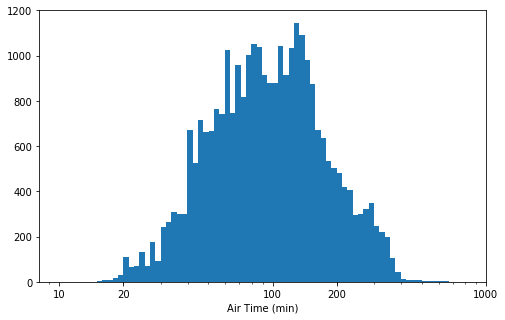

In [19]:
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(combined_df['AIR_TIME'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_df, x = 'AIR_TIME', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 100, 200, 1000], ['10', '20', '100', '200', '1000'])
plt.xlabel('Air Time (min)')
plt.show()

7. Distribution of departure delay times on a standard-scaled plot.

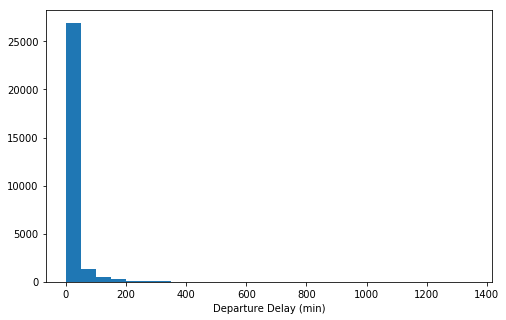

In [20]:
binsize = 50
bins = np.arange(0, combined_df['DEP_DELAY_NEW'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_df, x = 'DEP_DELAY_NEW', bins = bins)
plt.xlabel('Departure Delay (min)')
plt.show()

8. Distribution of departure delay times on a log-scaled plot.

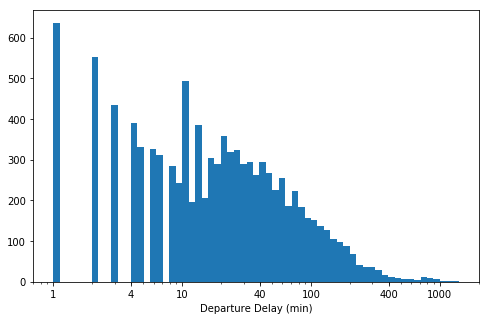

In [21]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(combined_df['DEP_DELAY_NEW'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_df, x = 'DEP_DELAY_NEW', bins = bins)
plt.xscale('log')
plt.xticks([1, 4, 10, 40, 100, 400, 1000], ['1', '4','10', '40', '100', '400', '1000'])
plt.xlabel('Departure Delay (min)')
plt.show()

9. Distribution of flight distances on a standard-scaled plot.

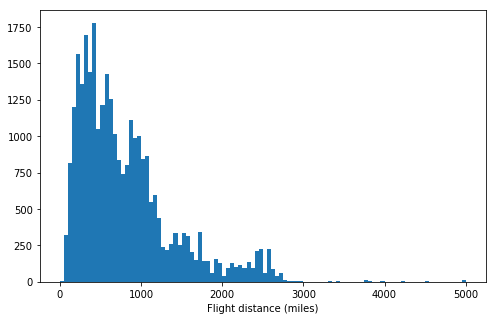

In [22]:
binsize = 50
bins = np.arange(0, combined_df['DISTANCE'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_df, x = 'DISTANCE', bins = bins)
plt.xlabel('Flight distance (miles)')
plt.show()

10. Distribution of flight distances on a log-scaled plot.

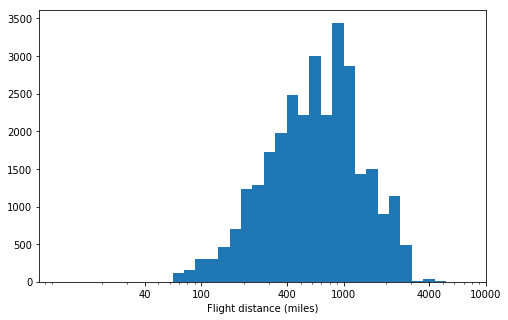

In [23]:
log_binsize = 0.08
bins = 10 ** np.arange(1, np.log10(combined_df['DISTANCE'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_df, x = 'DISTANCE', bins = bins)
plt.xscale('log')
plt.xticks([40, 100, 400, 1000, 4000, 10000], ['40', '100', '400', '1000', '4000', '10000'])
plt.xlabel('Flight distance (miles)')
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. Flights are mostly evenly distributed throughout the week, except for Saturdays, which has considerably less flights compared to the other days of the week.
2. Top destinations are California, Texas and Florida.
3. There are minimal amount of flights between 1 am and 4am, with most flights occuring early in the morning and late in the afternoon.
4. see above
5. Most flights are less than 200 minutes in duration.
6. Since there was a long tail on the previous graph with standard scale, a log-scaled graph was produced to better visualize the distribution of flights with longer durations.
7. Majority of delays are between 1 to 60 minutes.
8. Since there was a long tail on the previous graph with standard scale, a log-scaled graph was produced to better visualize the distribution of flights with longer delays.
9. Most flights are within 1000 mile distance, and less flights are between 1000 and 5000 miles.
10. Since there was a long tail on the previous graph with standard scale, a log-scaled graph was produced to better visualize the distribution of flights with longer distances.

### Summary
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The observed distribution of the data was close to what was expected.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Below is a heatmap of correlations between numeric type data, which we need to look at first to see whether there are any interesting correlations that we will want to explore further in our analysis. The strongest correlation is between air time and flight distance, which makes sense. There are also different amounts of correlations between delay reasons and overall departure delay, which also makes sense, since each separate delay reason contributes to overall delay. From this information we can say that late aircraft delay contributes the most to departure delays.

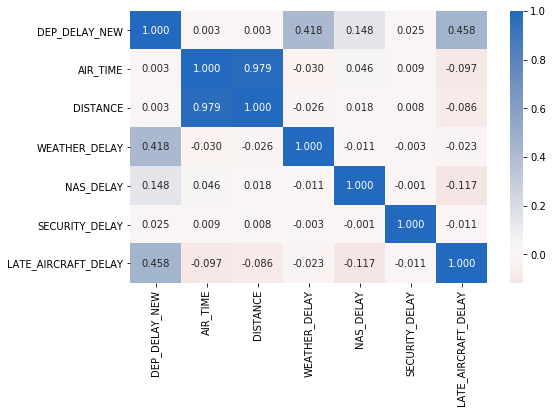

In [24]:
#correlation plot

numeric_vars = ['DEP_DELAY_NEW', 'AIR_TIME', 'DISTANCE', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
plt.figure(figsize = [8, 5])
sb.heatmap(combined_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Now, let's explore whether some airports are home to longer delays compared to others. Since there are about 330 different airports in the database, we will only look at the top 5 busiest ones. The first 3 airports have more longer delays than the last 2 airports.

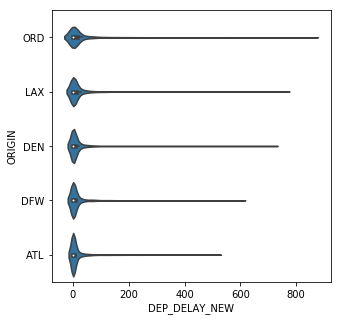

In [25]:
# get the list of top 5 busiest airports from the database.
top_5_origin = combined_df['ORIGIN'].value_counts().head(5).keys()
#create a dataframe with top 5 airports
top_5_origin_df = combined_df[combined_df['ORIGIN'].isin(top_5_origin)]
#order origins based on mean departure delay
my_order = top_5_origin_df.groupby(by=['ORIGIN'])['DEP_DELAY_NEW'].mean().sort_values(ascending=False).index
#create violinplot with order based on ascending mean departure delay
default_color = sb.color_palette()[0]
plt.figure(figsize = [5,5])
sb.violinplot(data = top_5_origin_df, y= 'ORIGIN', x= 'DEP_DELAY_NEW', color= default_color, order= my_order)

Now, let's create a similar plot to above, but this time we will exclude any flights with no delays.

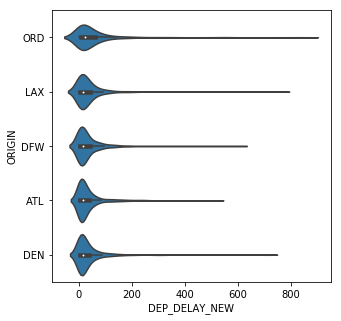

In [26]:
# get the list of top 5 airports from the database.
top_5_origin = combined_df['ORIGIN'].value_counts().head(5).keys()
#create a dataframe with top 5 airports, including fligths with delays only
top_5_origin_df = combined_df[combined_df['ORIGIN'].isin(top_5_origin) & combined_df['DEP_DELAY_NEW'] > 0]
#order origins based on mean departure delay
my_order = top_5_origin_df.groupby(by=['ORIGIN'])['DEP_DELAY_NEW'].mean().sort_values(ascending=False).index
#create violinplot with order based on ascending mean duration delay
default_color = sb.color_palette()[0]
plt.figure(figsize = [5,5])
sb.violinplot(data = top_5_origin_df, y= 'ORIGIN', x= 'DEP_DELAY_NEW', color= default_color, order= my_order)

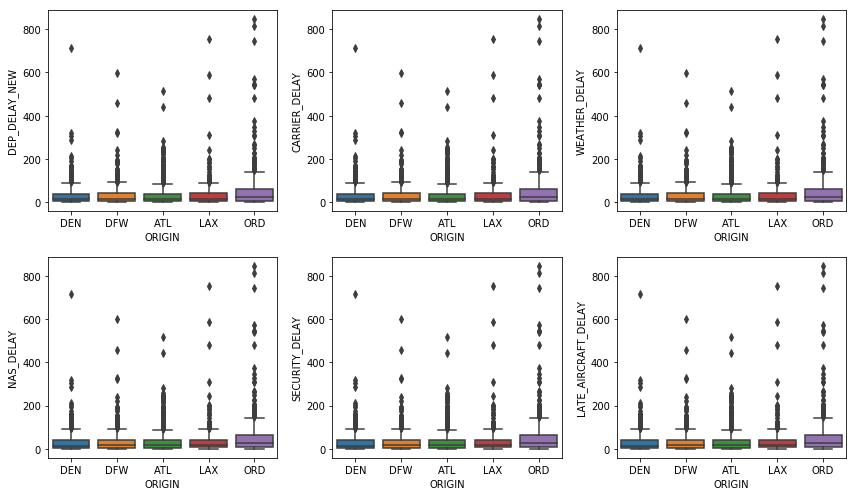

In [27]:
yvars = ['DEP_DELAY_NEW', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
         'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

plt.subplots(2,3,figsize=(12,7))
count = 1
for y in yvars:
    plt.subplot(2,3, count)
    sb.boxplot(x= "ORIGIN", y="DEP_DELAY_NEW", data=top_5_origin_df)
    plt.xlabel('ORIGIN')
    plt.ylabel(y)
    plt.tight_layout()
    count +=1

It is interesting to observe how flights with some destinations have higher divertion rates as depicted on the plot below.

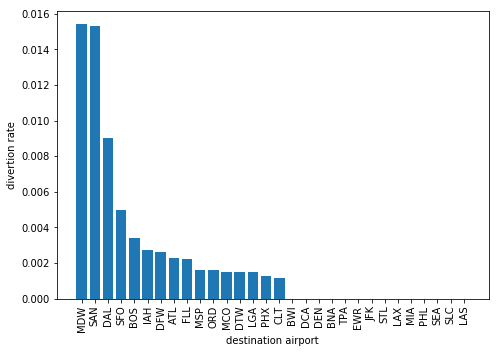

In [28]:
# get the list of top 30 destination airports from the database.
top_30_dest = combined_df['DEST'].value_counts().head(30).keys()
#create a dataframe with top 30 destination airports
top_30_dest_df = combined_df[combined_df['DEST'].isin(top_30_dest)]
#order destinations based on mean divertions
my_order = top_30_dest_df.groupby(by=['DEST'])['DIVERTED'].mean().sort_values(ascending=False)
# plot the barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dest = my_order.index
mean_diverted = my_order
ax.bar(dest,mean_diverted)
plt.xticks(rotation = 90)
plt.xlabel('destination airport')
plt.ylabel('divertion rate')
plt.show()

Let's now look at which airporst have more cancellations. Again, we will consider only the top 30 origins for our analysis. MDW has about 7 times more frequent cancellations than MIA.

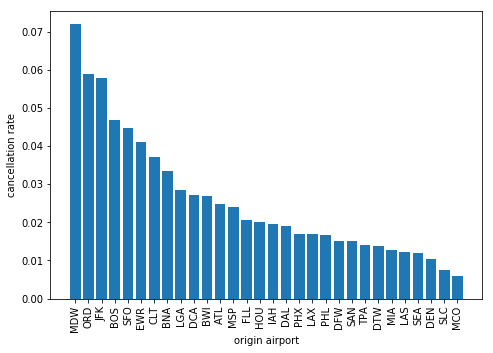

In [29]:
# get the list of top 30 airports from the database.
top_30_origin = combined_df['ORIGIN'].value_counts().head(30).keys()
#create a dataframe with top 30 airports
top_30_origin_df = combined_df[combined_df['ORIGIN'].isin(top_30_origin)]
#order origins based on mean cancellations
my_order = top_30_origin_df.groupby(by=['ORIGIN'])['CANCELLED'].mean().sort_values(ascending=False)
# plot the barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
origin = my_order.index
mean_cancellation = my_order
ax.bar(origin,mean_cancellation)
plt.xticks(rotation = 90)
plt.xlabel('origin airport')
plt.ylabel('cancellation rate')
plt.show()

Thursdays have higher cancellation rate compared to all other days. This is suprising to observe as it would be expected to have about the same cancellation rate throughout the week.

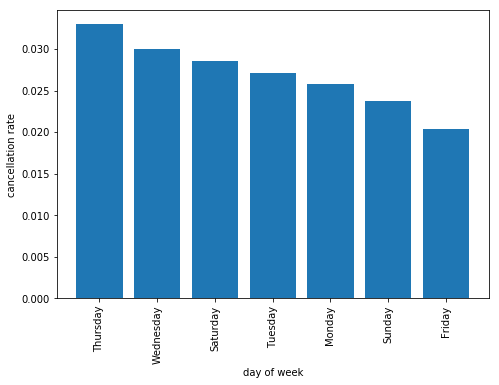

In [30]:
#order days of weak based on mean cancellations
my_order = combined_df.groupby(by=['DAY_OF_WEEK'])['CANCELLED'].mean().sort_values(ascending=False)
# plot the barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
origin = my_order.index
mean_canellation = my_order
ax.bar(origin,mean_canellation)
plt.xticks(rotation = 90)
plt.xlabel('day of week')
plt.ylabel('cancellation rate')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [31]:
# get the list of top 10 busiest origin airports from the database.
top_10_origin = combined_df['ORIGIN'].value_counts().head(10).keys()

#create a dataframe with top 10 busiest origin airports
top_10_origin_df = combined_df[combined_df['ORIGIN'].isin(top_10_origin)]

list(top_10_origin)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'CLT', 'PHX', 'SFO', 'LAS', 'IAH']

In [32]:
def cancellation_code_rate(airport, cancellation_code):
    code_occurence = top_10_origin_df[(top_10_origin_df['ORIGIN'] == airport) & (top_10_origin_df['CANCELLATION_CODE'] == cancellation_code)].shape[0]
    return (code_occurence/top_10_origin_df.shape[0])

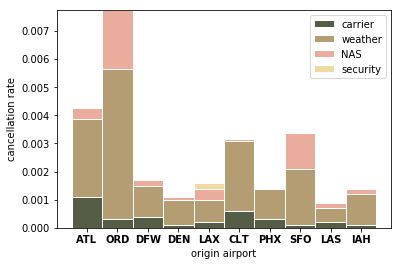

In [33]:
# Values of each group
bars1 = [cancellation_code_rate(airport, 'carrier') for airport in top_10_origin]
bars2 = [cancellation_code_rate(airport, 'weather') for airport in top_10_origin]
bars3 = [cancellation_code_rate(airport, 'NAS') for airport in top_10_origin]
bars4 = [cancellation_code_rate(airport, 'security') for airport in top_10_origin]

#cancellation reasons
cancellation_reasons = ['carrier', 'weather', 'NAS', 'security']

# Heights of bars1 + bars2
bars12 = np.add(bars1, bars2).tolist()

# Heights of bars1 + bars2 + bars3
bars123 = np.add(bars12, bars3).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9]
 
# Names of group and bar width
names = list(top_10_origin)
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#565d47', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#b49c73', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars12, color='#eaac9d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars4, bottom=bars123, color='#f0daa4', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("origin airport")
plt.ylabel('cancellation rate')
plt.legend(cancellation_reasons) 

# Show graphic
plt.show()


In [34]:
combined_df['DEP_DELAY_GROUP'].unique()

array([ 7., -1.,  5., 12.,  0.,  3.,  2.,  1., -2., nan,  8.,  6.,  4.,
       11.,  9., 10.])

Text(0.5, 0, 'Origin Airport')

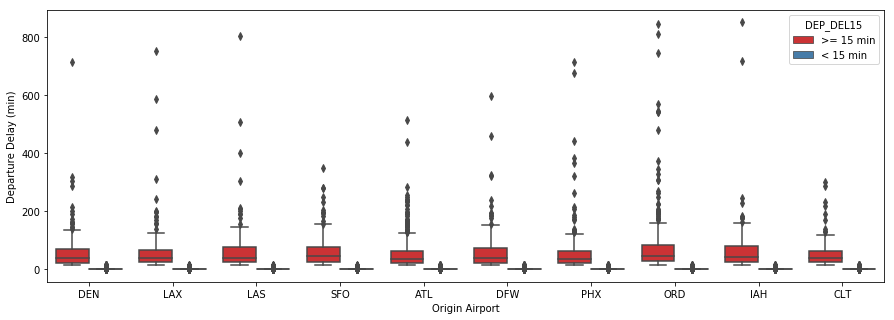

In [35]:
 # Grouped boxplot
filtered_data = top_10_origin_df[top_10_origin_df['DEP_DEL15'] != 'nan']    
plt.figure(figsize=(15,5))
sb.boxplot(x= "ORIGIN", y="DEP_DELAY_NEW", hue = "DEP_DEL15", data=filtered_data, palette = 'Set1')
plt.ylabel('Departure Delay (min)')
plt.xlabel('Origin Airport')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

To-do list:

- consider adding Cancellation code to the csv
- columnes needed for analysis: Year, Month, DayofMonth, DayOfWeek, DepTime, FlightNum, DepDelay, Origin, Dest, Distance, Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay,LateAircraftDelay, CRSDepTime



Variable descriptions
Name	Description
1	Year	1987-2008
2	Month	1-12
3	DayofMonth	1-31
4	DayOfWeek	1 (Monday) - 7 (Sunday)
5	DepTime	actual departure time (local, hhmm)
6	CRSDepTime	scheduled departure time (local, hhmm)
7	ArrTime	actual arrival time (local, hhmm)
8	CRSArrTime	scheduled arrival time (local, hhmm)
9	UniqueCarrier	unique carrier code
10	FlightNum	flight number
11	TailNum	plane tail number
12	ActualElapsedTime	in minutes
13	CRSElapsedTime	in minutes
14	AirTime	in minutes
15	ArrDelay	arrival delay, in minutes
16	DepDelay	departure delay, in minutes
17	Origin	origin IATA airport code
18	Dest	destination IATA airport code
19	Distance	in miles
20	TaxiIn	taxi in time, in minutes
21	TaxiOut	taxi out time in minutes
22	Cancelled	was the flight cancelled?
23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24	Diverted	1 = yes, 0 = no
25	CarrierDelay	in minutes
26	WeatherDelay	in minutes
27	NASDelay	in minutes
28	SecurityDelay	in minutes
29	LateAircraftDelay	in minute